In [1]:
%matplotlib inline
import os

import numpy as np
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import patheffects
from matplotlib.ticker import LogLocator, NullFormatter
from scipy.stats import genpareto, lognorm

import seaborn as sns
context = 'talk'
sns.set_context(context)
#sns.set_style('whitegrid')

plt.rcParams.update({
    "figure.facecolor":  (1.0, 1.0, 1.0, 1),  # red   with alpha = 30%
    "axes.facecolor":    (1.0, 1.0, 1.0, 1),  # green with alpha = 50%
    "savefig.facecolor": (1.0, 1.0, 1.0, 1),  # blue  with alpha = 20%
})
majlocator = LogLocator()

minlocator = LogLocator(base=10.0, subs=np.arange(0.1, 1, 0.1), numticks=12)
intervals = np.array([5, 10, 25, 50, 100, 250, 500, 1000, 2000, 5000])
pe = patheffects.withStroke(linewidth=5, foreground='w')

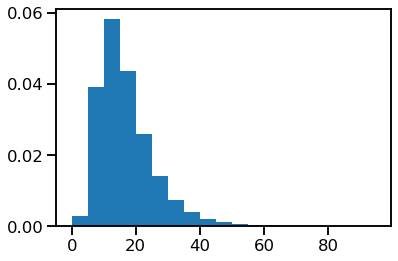

In [2]:
mu, xi, sigma = 0, .5, 15
npyr = 365.25
baservs = lognorm.rvs(xi, mu, sigma, size=int(1000*npyr))
cdist, cbins, patches = plt.hist(baservs, bins=np.arange(0, 100, 5), density=True)


In [3]:
lognorm.stats(xi, mu, sigma, moments='mvsk')

(array(16.9972268), array(82.05656715), array(1.75018966), array(5.89844567))

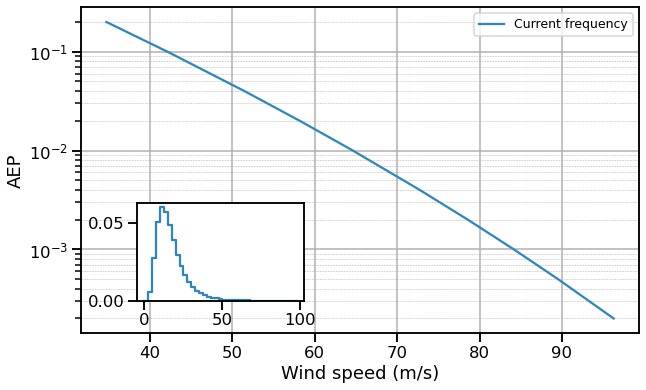

In [4]:
pct = 0.99
rate = (1. - pct)
threshold = np.percentile(baservs, pct)
y = baservs[baservs > threshold] - threshold
# Fit the tail of the distribution above the threshold
gpd = genpareto.fit(y)

def returnLevels(intervals, mu, xi, sigma, rate, npyr=365.25):
    rp = mu + (sigma / xi) * (np.power(intervals * npyr * rate, xi) - 1.)
    return rp

aep = 1 - np.exp(-1/intervals)
fig, ax = plt.subplots(1, 1, figsize=(10,6))
baservals = returnLevels(intervals, gpd[1], gpd[0], gpd[2], rate)
rvals2 = returnLevels(intervals, gpd[1], gpd[0], gpd[2], rate/2)
rvals2b = returnLevels(intervals, gpd[1], gpd[0], gpd[2], rate*1.5)
ax.semilogy(baservals, aep, color='#2E86C1', label='Current frequency', path_effects=[pe])
#ax.semilogy(rvals2b, aep, color='k', linestyle='--', label='Increased frequency')
#ax.semilogy(rvals2, aep, color='k', label='Reduced frequency')
ax.set_xlabel("Wind speed [m/s]")
ax.set_ylabel("AEP")
ax.yaxis.set_major_locator(majlocator)
ax.yaxis.set_minor_locator(minlocator)
ax.yaxis.set_minor_formatter(NullFormatter())
ax.grid()
ax.grid(which='minor', linestyle='--', linewidth=0.5)
ax.legend(fontsize='x-small', loc=3)
ax.text(0.975, 0.975, "(a)", ha='right', va='top', transform=ax.transAxes)
#axin = ax.inset_axes([0.1, 0.1, 0.3, 0.3])
#sns.histplot(baservs, bins=np.arange(0, 100, 2.5), element="step", stat="density", fill=False, ax=axin, color='#2E86C1')
#axin.yaxis.label.set_visible(False)
plt.savefig("current_ari.png", dpi=300, bbox_inches="tight")

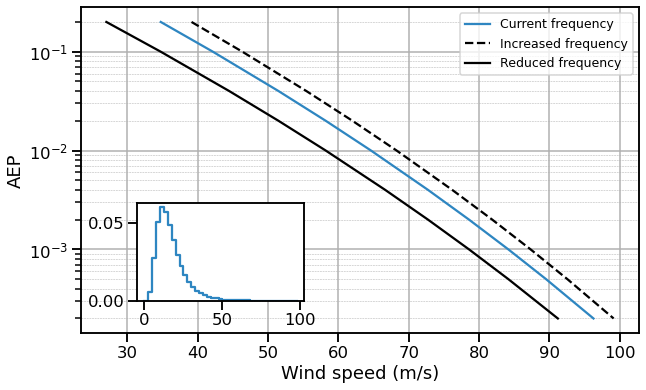

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.semilogy(baservals, aep, color='#2E86C1', label='Current frequency', path_effects=[pe])
ax.semilogy(rvals2b, aep, color='k', linestyle='--', label='Increased frequency', path_effects=[pe])
ax.semilogy(rvals2, aep, color='k', label='Reduced frequency')
ax.set_xlabel("Wind speed [m/s]")
ax.set_ylabel("AEP")
ax.yaxis.set_major_locator(majlocator)
ax.yaxis.set_minor_locator(minlocator)
ax.yaxis.set_minor_formatter(NullFormatter())
ax.grid()
ax.grid(which='minor', linestyle='--', linewidth=0.5)
ax.legend(fontsize='x-small', loc=3)
ax.text(0.975, 0.975, "(c)", ha='right', va='top', transform=ax.transAxes)
#axin = ax.inset_axes([0.1, 0.1, 0.3, 0.3])
#sns.histplot(baservs, bins=np.arange(0, 100, 2.5), element="step", stat="density", fill=False, ax=axin, color='#2E86C1')
#axin.yaxis.label.set_visible(False)
plt.savefig("dfreq_ari.png", dpi=300, bbox_inches="tight")

This figure shows the change in AEP for given wind speeds, when the frequency is reduced by 50%. The inset figure shows the distribution of wind speeds. In this case, the distributions are identical as they normalised (area below the curve is unity). The result of reducing the frequency is to move the AEP curve downwards. Also shown is the impact of increasing the frequency by 50%. 

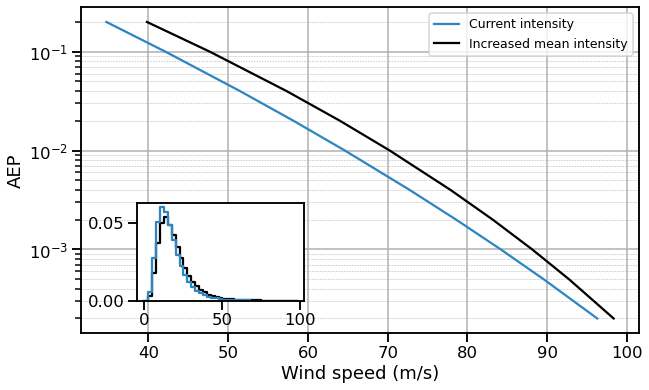

In [6]:
mu, xi, sigma = 0, .5, 17
npyr = 365.25
rvs = lognorm.rvs(xi, mu, sigma, size=int(1000*npyr))
#ax.step(cbins[:-1], cdist,  color='k')threshold = np.percentile(rvs, pct)
y = rvs[rvs>threshold] - threshold
# Fit the tail of the distribution above the threshold
gpd = genpareto.fit(y)
rvals3 = returnLevels(intervals, gpd[1], gpd[0], gpd[2], rate)

fig, ax = plt.subplots(1, 1, figsize=(10,6))

ax.semilogy(baservals, aep, color='#2E86C1', label='Current intensity', path_effects=[pe])
ax.semilogy(rvals3, aep, color='k', label='Increased mean intensity', path_effects=[pe])
ax.set_xlabel("Wind speed [m/s]")
ax.set_ylabel("AEP")
ax.yaxis.set_major_locator(majlocator)
ax.yaxis.set_minor_locator(minlocator)
ax.yaxis.set_minor_formatter(NullFormatter())
ax.grid()
ax.grid(which='minor', linestyle='--', linewidth=0.5)
ax.legend(fontsize='x-small', loc=3)
ax.text(0.975, 0.975, "(b)", ha='right', va='top', transform=ax.transAxes)
#axin = ax.inset_axes([0.1, 0.1, 0.3, 0.3])
#sns.histplot(rvs, bins=np.arange(0, 100, 2.5), element="step", stat="density", fill=False, ax=axin, color='k')
#sns.histplot(baservs, bins=np.arange(0, 100, 2.5), element="step", stat="density", fill=False, ax=axin, color='#2E86C1')
#axin.yaxis.label.set_visible(False)
plt.savefig("dmean_ari.png", dpi=300, bbox_inches="tight")

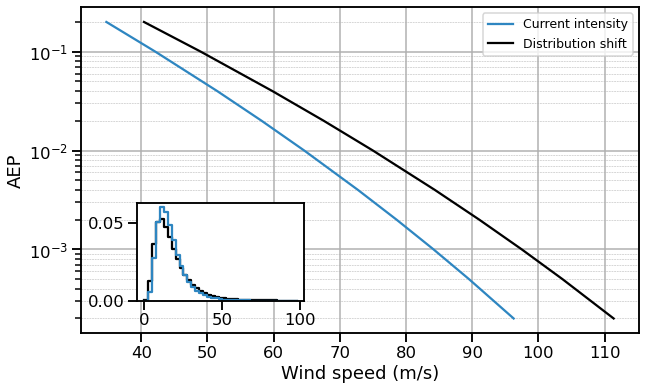

In [9]:
mu, xi, sigma = 0, .6, 15
npyr = 365.25
rvs = lognorm.rvs(xi, mu, sigma, size=int(1000*npyr))

threshold = np.percentile(rvs, pct)
y = rvs[rvs>threshold] - threshold
# Fit the tail of the distribution above the threshold
gpd = genpareto.fit(y)
rvals4 = returnLevels(intervals, gpd[1], gpd[0], gpd[2], rate)
fig, ax = plt.subplots(1, 1, figsize=(10,6))

ax.semilogy(baservals, aep, color='#2E86C1', label='Current intensity')
ax.semilogy(rvals4, aep, color='k', label='Distribution shift')
ax.set_xlabel("Wind speed (m/s)")
ax.set_ylabel("AEP")
ax.yaxis.set_major_locator(majlocator)
ax.yaxis.set_minor_locator(minlocator)
ax.yaxis.set_minor_formatter(NullFormatter())
ax.grid()
ax.grid(which='minor', linestyle='--', linewidth=0.5)
ax.legend(fontsize='x-small')

axin = ax.inset_axes([0.1, 0.1, 0.3, 0.3])
sns.histplot(rvs, bins=np.arange(0, 100, 2.5), element="step", stat="density", fill=False, ax=axin, color='k')
sns.histplot(baservs, bins=np.arange(0, 100, 2.5), element="step", stat="density", fill=False, ax=axin, color='#2E86C1')
axin.yaxis.label.set_visible(False)
plt.savefig("ddist_ari.png", dpi=300, bbox_inches="tight")

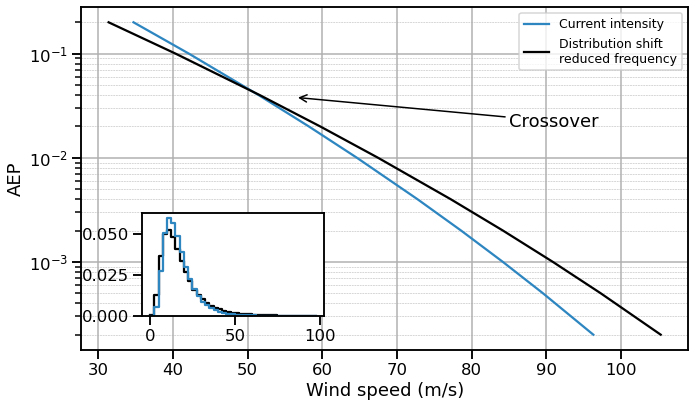

In [10]:
mu, xi, sigma = 0, .6, 15
npyr = 365.25
rvs = lognorm.rvs(xi, mu, sigma, size=int(1000*npyr))

threshold = np.percentile(rvs, pct)
y = rvs[rvs>threshold] - threshold
# Fit the tail of the distribution above the threshold
gpd = genpareto.fit(y)
rvals5 = returnLevels(intervals, gpd[1], gpd[0], gpd[2], rate*.5)
fig, ax = plt.subplots(1, 1, figsize=(10,6))

ax.semilogy(baservals, aep, color='#2E86C1', label='Current intensity')
ax.semilogy(rvals5, aep, color='k', label='Distribution shift\nreduced frequency')
ax.set_xlabel("Wind speed (m/s)")
ax.set_ylabel("AEP")
ax.yaxis.set_major_locator(majlocator)
ax.yaxis.set_minor_locator(minlocator)
ax.yaxis.set_minor_formatter(NullFormatter())
ax.grid()
ax.grid(which='minor', linestyle='--', linewidth=0.5)
ax.legend(fontsize='x-small')
axin = ax.inset_axes([0.1, 0.1, 0.3, 0.3])
sns.histplot(rvs, bins=np.arange(0, 100, 2.5), element="step", stat="density", fill=False, ax=axin, color='k')
sns.histplot(baservs, bins=np.arange(0, 100, 2.5), element="step", stat="density", fill=False, ax=axin, color='#2E86C1')
axin.yaxis.label.set_visible(False)

x = baservals[np.argmin(np.abs(baservals - rvals5))]
y = aep[np.argmin(np.abs(baservals - rvals5))]
ax.annotate("Crossover", xy=(x+5, y*0.95), xytext=(85, 0.02),
            arrowprops=dict(arrowstyle='->', facecolor='k'))
None
fig.tight_layout()
plt.savefig("dfreqdist_ari.png", dpi=300, bbox_inches="tight")

The crossover point above will vary depending on the combination of the intensity distribution change and the frequency change. A larger decrease in the frequency would shift the crossover point further to the right (we use a 50% reduction in this example).  

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15, 8.5), sharex=True, sharey=True)


ax[0, 0].semilogy(baservals, aep, color='#2E86C1', label='Current frequency', path_effects=[pe])
#ax.semilogy(rvals2b, aep, color='k', linestyle='--', label='Increased frequency')
#ax.semilogy(rvals2, aep, color='k', label='Reduced frequency')
#ax[0, 0].set_xlabel("Wind speed [m/s]")
ax[0, 0].set_ylabel("AEP")
ax[0, 0].yaxis.set_major_locator(majlocator)
ax[0, 0].yaxis.set_minor_locator(minlocator)
ax[0, 0].yaxis.set_minor_formatter(NullFormatter())
ax[0, 0].grid()
ax[0, 0].grid(which='minor', linestyle='--', linewidth=0.5)
ax[0, 0].legend(fontsize='x-small', loc=3)
ax[0, 0].text(0.975, 0.95, "(a)", ha='right', va='top', transform=ax[0, 0].transAxes,
                bbox=dict(boxstyle="round", fc="white", ec="white", alpha=0.75))

ax[0, 1].semilogy(baservals, aep, color='#2E86C1', label='Current intensity', path_effects=[pe])
ax[0, 1].semilogy(rvals4, aep, color='k', label='Distribution shift', path_effects=[pe])
#ax[0, 1].set_xlabel("Wind speed [m/s]")
#ax[0, 1].set_ylabel("AEP")
ax[0, 1].yaxis.set_major_locator(majlocator)
ax[0, 1].yaxis.set_minor_locator(minlocator)
ax[0, 1].yaxis.set_minor_formatter(NullFormatter())
ax[0, 1].grid()
ax[0, 1].grid(which='minor', linestyle='--', linewidth=0.5)
ax[0, 1].legend(fontsize='x-small', loc=3)
ax[0, 1].text(0.975, 0.95, "(b)", ha='right', va='top', transform=ax[0, 1].transAxes,
                bbox=dict(boxstyle="round", fc="white", ec="white", alpha=0.75))

ax[1, 0].semilogy(baservals, aep, color='#2E86C1', label='Current frequency', path_effects=[pe])
ax[1, 0].semilogy(rvals2b, aep, color='k', linestyle='--', label='Increased frequency', path_effects=[pe])
ax[1, 0].semilogy(rvals2, aep, color='k', label='Reduced frequency')
ax[1, 0].set_xlabel("Wind speed [m/s]")
ax[1, 0].set_ylabel("AEP")
ax[1, 0].yaxis.set_major_locator(majlocator)
ax[1, 0].yaxis.set_minor_locator(minlocator)
ax[1, 0].yaxis.set_minor_formatter(NullFormatter())
ax[1, 0].grid()
ax[1, 0].grid(which='minor', linestyle='--', linewidth=0.5)
ax[1, 0].legend(fontsize='x-small', loc=3)
ax[1, 0].text(0.975, 0.95, "(c)", ha='right', va='top', transform=ax[1, 0].transAxes,
                bbox=dict(boxstyle="round", fc="white", ec="white", alpha=0.75))

ax[1, 1].semilogy(baservals, aep, color='#2E86C1', label='Current intensity', path_effects=[pe])
ax[1, 1].semilogy(rvals5, aep, color='k', label='Distribution shift\nreduced frequency', path_effects=[pe])
ax[1, 1].set_xlabel("Wind speed [m/s]")
#ax[1, 1].set_ylabel("AEP")
ax[1, 1].yaxis.set_major_locator(majlocator)
ax[1, 1].yaxis.set_minor_locator(minlocator)
ax[1, 1].yaxis.set_minor_formatter(NullFormatter())
ax[1, 1].grid()
ax[1, 1].grid(which='minor', linestyle='--', linewidth=0.5)
ax[1, 1].legend(fontsize='x-small', loc=3)
ax[1, 1].text(0.975, 0.95, "(d)", ha='right', va='top', transform=ax[1, 1].transAxes,
                bbox=dict(boxstyle="round", fc="white", ec="white", alpha=0.75))
#axin = ax.inset_axes([0.1, 0.1, 0.3, 0.3])
#sns.histplot(rvs, bins=np.arange(0, 100, 2.5), element="step", stat="density", fill=False, ax=axin, color='k')
#sns.histplot(baservs, bins=np.arange(0, 100, 2.5), element="step", stat="density", fill=False, ax=axin, color='#2E86C1')
#axin.yaxis.label.set_visible(False)

x = baservals[np.argmin(np.abs(baservals - rvals5))]
y = aep[np.argmin(np.abs(baservals - rvals5))]
ax[1, 1].annotate("Crossover", xy=(x*1.05, y), xytext=(85, 0.02),
            arrowprops=dict(arrowstyle='->', facecolor='k'),
            bbox=dict(boxstyle="round", fc="white", alpha=0.75))

fig.tight_layout()
plt.savefig("AEPchanges_demo.png", dpi=300, bbox_inches="tight")